In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io as io
import numpy as np
import pandas as pd
import matplotlib

from hydrophone_data_processing import load
from obspy.signal.tf_misfit import cwt
import obspy

In [2]:
paths = ['/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.138']

day138 = load.import_corrected_data_for_single_day(paths=paths)

In [3]:
bubbles = pd.read_csv('allbubblesh1.csv', names=np.arange(2114))


In [4]:
bubble_waveform = day138.slice(starttime=obspy.UTCDateTime('2019-05-18T21:23:38')
           ,endtime=obspy.UTCDateTime('2019-05-18T21:23:45'))

In [5]:
# x = day138.plot(starttime=obspy.UTCDateTime('2019-05-18T21:23:38')
#            ,endtime=obspy.UTCDateTime('2019-05-18T21:23:45'))

In [6]:
# plt.plot(bw_h1.data[:2860])

In [19]:
# bubid = np.random.choice(bubbles.columns, 25)

In [44]:
# bubid

array([1279,  974, 1515,  889,  536,  931,   64, 1765, 2037, 1842,  957,
        555,  155, 1640, 1572,  354, 2058, 1346,  131, 1755,  407, 1438,
        881,  847, 1354])

/tmp/ipykernel_28222/855856978.py:74: UserWarning: Use the colorbar set_ticks() method instead.
  cbar_ax.set_yticks(np.arange(-25, 5, 5))
/tmp/ipykernel_28222/855856978.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar_ax.set_yticklabels(np.arange(-25, 5, 5), fontsize=15)
/tmp/ipykernel_28222/855856978.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


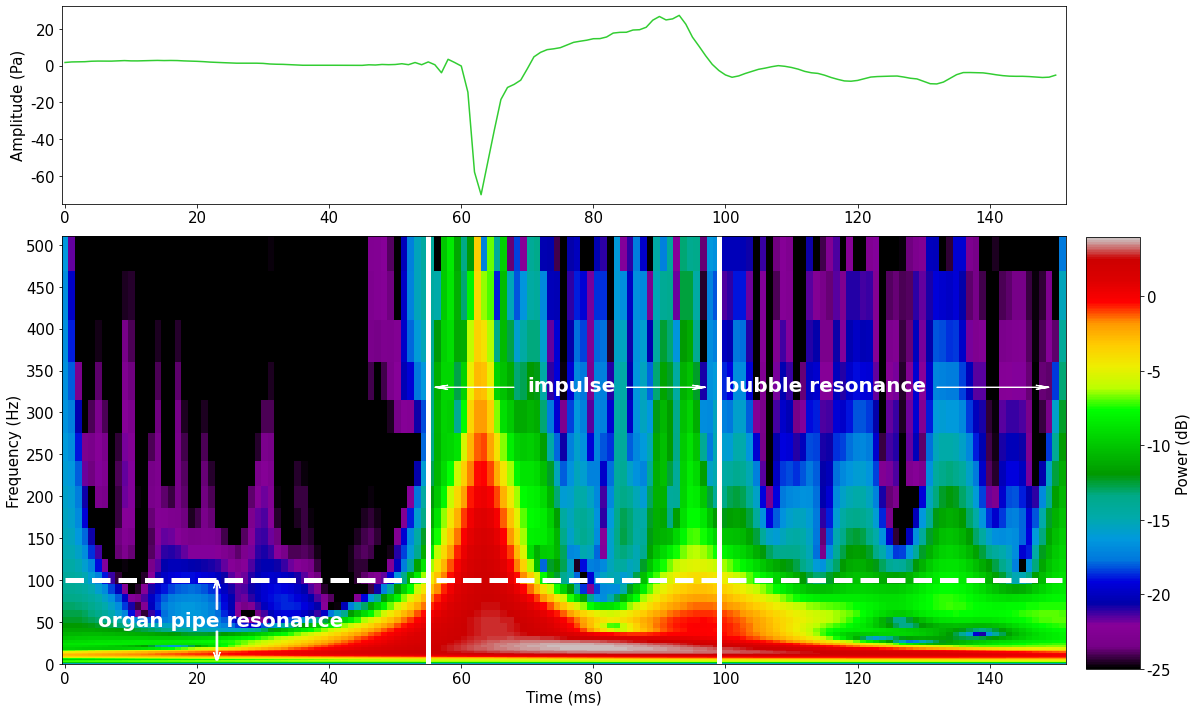

In [131]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=3, rowspan=2, sharex=ax)

f_min = 0.001
f_max = 500
dt = day138[0].stats.delta

f_min = 0.001
f_max = 500
dt = day138[0].stats.delta

i = 1354

bw_h1 = bubbles[i].values
npts = bw_h1.shape[0]

t = np.linspace(0, dt*npts, npts)
scalogram = cwt(bw_h1, dt, 3, f_min, f_max)

x, y = np.meshgrid(t, np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))

ax.plot(bw_h1, color='limegreen')
ax.set_ylabel('Amplitude (Pa)', fontsize=15)

# ax.set_xticks([])

cbar = ax2.pcolormesh(x*1000, y, 10*np.log10(np.abs(scalogram))
                      , cmap='nipy_spectral', shading='auto'
                      , vmax=4, vmin=-25)

cbar_ax = fig.add_axes([1.0085, 0.065, 0.05, 0.6])
c = fig.colorbar(cbar, cax=cbar_ax)

c.ax.set_ylabel('Power (dB)', fontsize=15)


ax2.set_ylabel('Frequency (Hz)', fontsize=15)
ax2.set_xlabel('Time (ms)', fontsize=15)

ax2.set_ylim(0, 510)

ax2.plot([0, 151], [100, 100], linestyle='--', linewidth=5, color='white')
ax2.plot([55, 55], [0, 550], linestyle='-', linewidth=5, color='white')
ax2.plot([99, 99], [0, 550], linestyle='-', linewidth=5, color='white')

ax2.text(s='organ pipe resonance', x=5, y=45, color='white', fontsize=20, weight='bold')
ax2.arrow(x=23, y=65, dx=0, dy=25, color='white', width=0.25, overhang=1, head_width= 1, head_length=10)
ax2.arrow(x=23, y=39, dx=0, dy=-25, color='white', width=0.25, overhang=1, head_width=1, head_length=10)

ax2.text(s='impulse', x=70, y=325, color='white', fontsize=20, weight='bold')
ax2.arrow(x=68, y=330, dx=-10, dy=0, color='white', width=0.25, overhang=1, head_width=5 , head_length=2)
ax2.arrow(x=85, y=330, dx=10, dy=0, color='white', width=0.25, overhang=1, head_width=5 , head_length=2)

ax2.text(s='bubble resonance', x=100, y=325, color='white', fontsize=20, weight='bold')
ax2.arrow(x=132, y=330, dx=15, dy=0, color='white', width=0.25, overhang=1, head_width=5 , head_length=2)

# ax3 = fig.add_axes([0.6, 0.6, 0.35, 0.175]), head_length=2
# ax3.hist((10*np.log10(np.abs(scalogram))).flatten(), bins=40*3)
# ax3.set_xlabel('Power (dB)', fontsize=15)

ax.set_xticks(np.arange(0, 150, 20))
ax.set_xticklabels(np.arange(0, 150, 20), fontsize=15)

ax2.set_xticks(np.arange(0, 150, 20))
ax2.set_xticklabels(np.arange(0, 150, 20), fontsize=15)

ax.set_yticks(np.arange(-60, 30, 20))
ax.set_yticklabels(np.arange(-60, 30, 20), fontsize=15)

ax2.set_yticks(np.arange(0, 510, 50))
ax2.set_yticklabels(np.arange(0, 510, 50), fontsize=15)

cbar_ax.set_yticks(np.arange(-25, 5, 5))
cbar_ax.set_yticklabels(np.arange(-25, 5, 5), fontsize=15)

fig.tight_layout()

fig.savefig('figures/cwt_supp.pdf', bbox_inches='tight')
# plt.close()

In [52]:
y.max()

499.99999999999994

In [ ]:
f_min = 0.001
f_max = 500
dt = day138[0].stats.delta

# for n, i in enumerate(bubid):
for n, i in enumerate(bubbles.columns):
    bw_h1 = bubbles[i].values
    npts = bw_h1.shape[0]
    
    t = np.linspace(0, dt*npts, npts)
    scalogram = cwt(bw_h1, dt, 3, f_min, f_max)
    
    x, y = np.meshgrid(t, np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))
    
    fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
    
    ax.plot(bw_h1, color=plt.cm.jet(n/bubid.shape[0]))
    ax.set_ylabel('Amplitude (Pa)', fontsize=15)
    
    cbar = ax2.pcolormesh(x*1000, y, 10*np.log10(np.abs(scalogram))
                          , cmap='nipy_spectral', shading='auto'
                          , vmax=4, vmin=-25)

    cbar_ax = fig.add_axes([1.0085, 0.15, 0.05, 0.7])
    c = fig.colorbar(cbar, cax=cbar_ax)

    c.ax.set_ylabel('Power (dB)', fontsize=15)


    ax2.set_ylabel('Frequency (Hz)', fontsize=15)
    ax2.set_xlabel('Time (ms)', fontsize=15)
    
    ax3 = fig.add_axes([0.6, 0.56, 0.35, 0.175])
    ax3.hist((10*np.log10(np.abs(scalogram))).flatten(), bins=40*3)

    fig.tight_layout()
    
    fig.savefig('cwtfigs/{n}.pdf'.format(n=n), bbox_inches='tight')
    plt.close()

/tmp/ipykernel_24886/209130901.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_24886/209130901.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_24886/209130901.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_24886/209130901.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_24886/209130901.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_24886/209130901.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be 

(array([  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   5.00000000e+00,   6.00000000e+00,
          6.00000000e+00,   6.00000000e+00,   1.00000000e+01,
          6.00000000e+00,   1.40000000e+01,   1.40000000e+01,
          1.40000000e+01,   2.10000000e+01,   3.00000000e+01,
          2.90000000e+01,   3.50000000e+01,   4.00000000e+01,
          4.50000000e+01,   5.20000000e+01,   6.30000000e+01,
          7.40000000e+01,   9.00000000e+01,   1.07000000e+02,
          1.28000000e+02,   1.62000000e+02,   1.87000000e+02,
          2.08000000e+02,   2.28000000e+02,   2.77000000e+02,
          2.81000000e+02,   3.56000000e+02,   3.77000000e+02,
          3.54000000e+02,   3.77000000e+02,   4.50000000e+02,
        

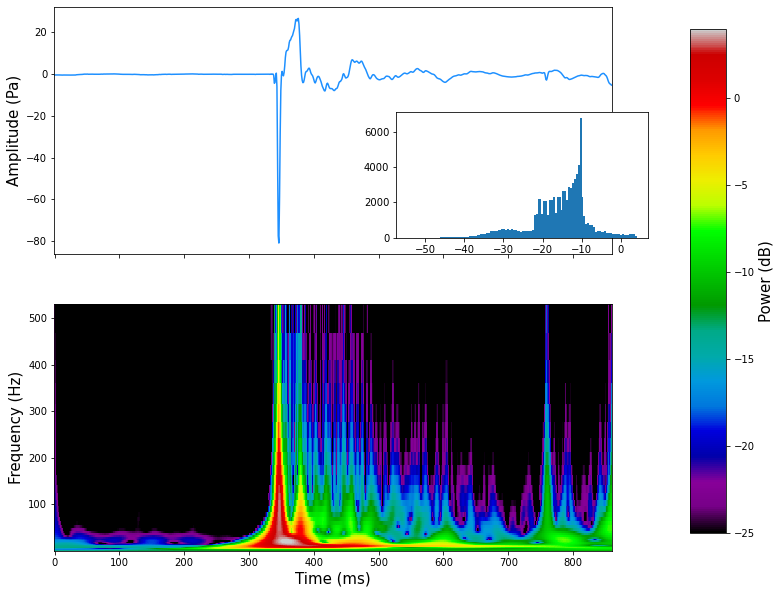

In [41]:
f_min=0.001
f_max=500
dt = day138[0].stats.delta

bw_h1 = bubble_waveform[0]

# npts = bubbles[230].shape[0]
# npts = bw_h1.data.shape[0]
# tr = bubbles[230].values
tr = bw_h1.data[2000:2860]
npts = tr.shape[0]

t = np.linspace(0, dt * npts, npts)
scalogram = cwt(tr, dt, 3, f_min, f_max)

x, y = np.meshgrid(t, np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))

fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# bubbles[230].plot(ax=ax)
ax.plot(tr, color='dodgerblue')
ax.set_ylabel('Amplitude (Pa)', fontsize=15)

# cbar = ax2.pcolormesh(x*1000, y, 10*np.log10(np.abs(scalogram)), cmap='nipy_spectral', shading='auto', vmax=-4.8, vmin=-25)
cbar = ax2.pcolormesh(x*1000, y, 10*np.log10(np.abs(scalogram)), cmap='nipy_spectral', shading='auto', vmax=4, vmin=-25)

cbar_ax = fig.add_axes([1.0085, 0.15, 0.05, 0.7])
c = fig.colorbar(cbar, cax=cbar_ax)

c.ax.set_ylabel('Power (dB)', fontsize=15)


ax2.set_ylabel('Frequency (Hz)', fontsize=15)
ax2.set_xlabel('Time (ms)', fontsize=15)

ax3 = fig.add_axes([0.6, 0.56, 0.35, 0.175])
ax3.hist((10*np.log10(np.abs(scalogram))).flatten(), bins=40*3)


# ax2.set_yscale('log')

fig.tight_layout()
# fig.savefig('figures/supp.pdf', bbox_inches='tight', dpi=300)

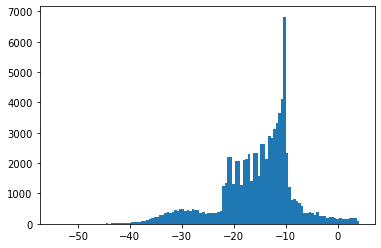

In [110]:
z = plt.hist((10*np.log10(np.abs(scalogram))).flatten(), bins=40*3)

In [113]:
10*np.log10(np.abs(scalogram)).flatten().max()

4.1093007840755442